## This small notebook is mainly just testing

In [1]:
import matplotlib.pyplot as plt
from utils import *
from pydicom import dcmread
from skimage.transform import resize
from processing import *

In [2]:
image_path = "F:/Bases/Cancer/Mama/Mamografias/VinDr/images/02bd0bd83c6d9fedc49b0df6ecd952c6/a983c256635655ed394ed6805abf0499.dicom" # Put the path to a mammography image here, either DICOM, PNG or JPG

In [3]:
def read_dicom_mg(image_path):
    dcm = pydicom.dcmread(image_path)
    pixel_array = dcm.pixel_array
    normalized_array = pixel_array.astype(np.float32) / pixel_array.max()

    return normalized_array

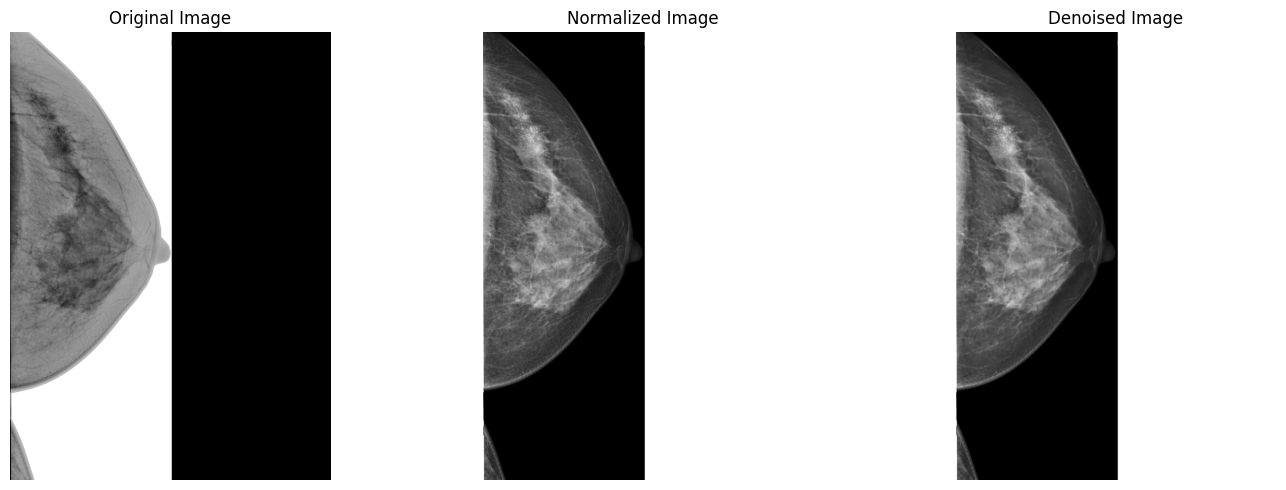

In [5]:
if image_path.lower().endswith(('.dcm', '.dicom', '.dcm')):
    original_image = read_dicom_mg(image_path)
    normalized_image = dicom_preprocessing(image_path, 2812, 2012)
else:
    original_image = cv2.imread(image_path)
    normalized_image = cv2.normalize(original_image.astype(float), None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)

denoised_image = reduce_poisson_noise(normalized_image)

# Plot the images
titles = ['Original Image', 'Normalized Image', 'Denoised Image']
images = [original_image, normalized_image, denoised_image]

plt.figure(figsize=(15, 5))
for i in range(3):
    plt.subplot(1, 3, i + 1)
    plt.title(titles[i])
    if images[i].ndim == 2:
        plt.imshow(images[i], cmap='gray')
    else:
        plt.imshow(cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB))
    plt.axis('off')

plt.tight_layout()
plt.show()